In [34]:
#Logistic Regression is not a number (ex. is an email spam?)
#Equation: 1/(1+e^-x), because x=-inf means y=0 and x=+inf means y=0
#Multiple is for more than 2 (Ex. Is someone Democratic, Republican, or Independent)

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_iris
from sklearn.metrics import confusion_matrix

In [2]:
digits = load_digits() #database of 1797 8*8 images correlating to a handwritten number 0-9

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.images[0] #these numbers are the grayscale of the images

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
digits.data[0] #numbers that represents the images

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

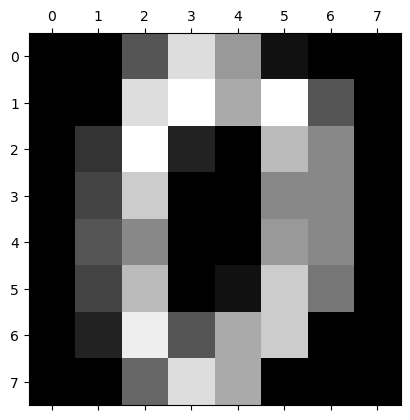

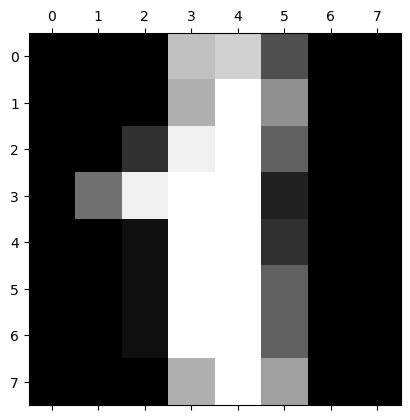

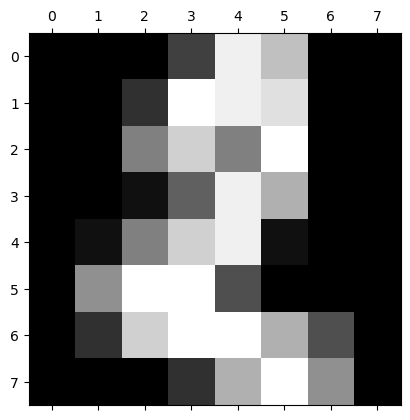

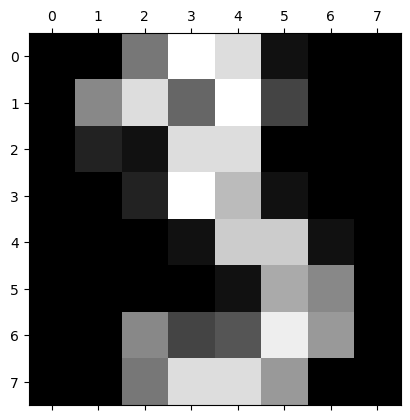

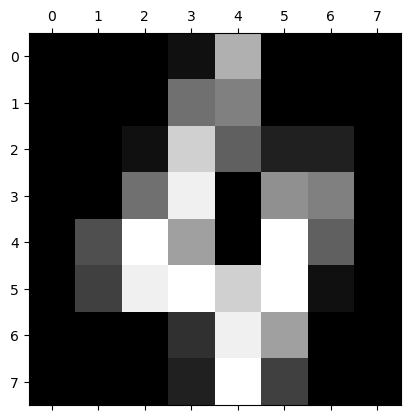

In [7]:
plt.gray() #grayscale of the images
for i in range(5):
    plt.matshow(digits.images[i])

In [8]:
digits.target[0:5] #what the acctual numbers in the list represent (predicted output)

array([0, 1, 2, 3, 4])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.2) #X, y with input and expected output

In [11]:
len(X_train),len(X_test)

(1437, 360)

In [12]:
model = LogisticRegression()

In [13]:
model.fit(X_train, y_train)

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
model.score(X_test, y_test) #logistic regression model is pretty good

0.9694444444444444

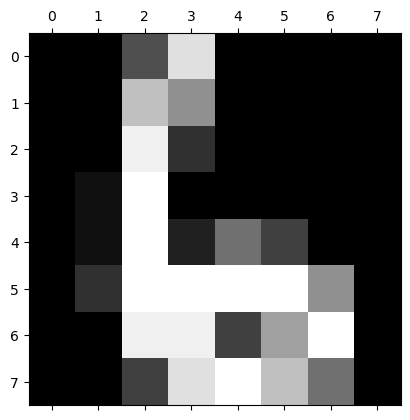

In [16]:
plt.matshow(digits.images[67])

In [17]:
digits.target[67]

6

In [22]:
model.predict([digits.data[67]])

array([6])

In [24]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [31]:
y_predicted = model.predict(X_test) #storing the predictions for images
cm = confusion_matrix(y_test, y_predicted) #creates a 2d array from 0-9 on predicted compared to actual
cm

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 27,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 36,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  1, 35]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

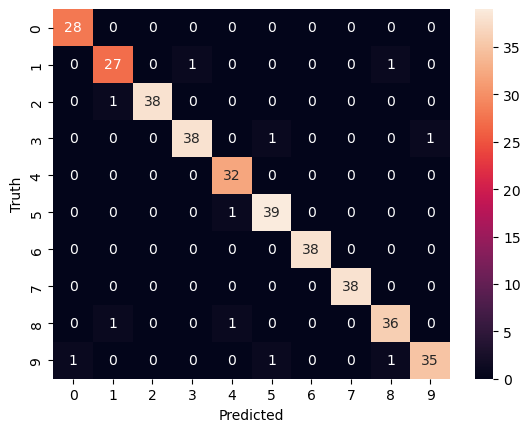

In [32]:
sb.heatmap(cm, annot=True)  #should be read as 28 times predicted 0 and answer was 0, 1 time predicted 1 but as actually 2
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
#Exercise
#Use flower dataset to rain model with logistic regression to classify [setosa, versicolour, virginica]
data2 = load_iris()
dir(data2)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [36]:
data2.data[0] #sepal length, sepal width, petal length, petal width

array([5.1, 3.5, 1.4, 0.2])

In [38]:
data2.target[0], data2.target_names

(0, array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [48]:
X_tr, X_te, y_tr, y_te = train_test_split(data2.data, data2.target, test_size = 0.2)

In [49]:
model2 = LogisticRegression()
model2.fit(X_tr, y_tr)

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
model2.score(X_te, y_te)

1.0

Text(50.722222222222214, 0.5, 'Truth')

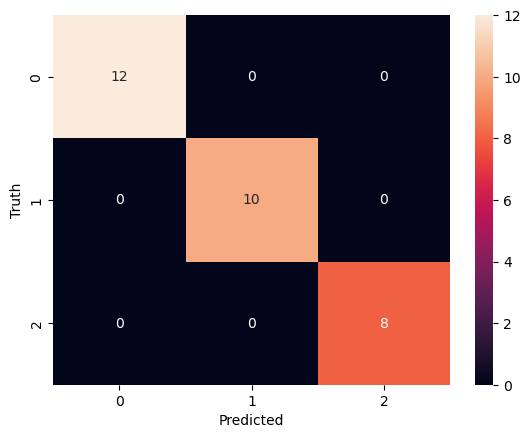

In [54]:
y_pre = model2.predict(X_te)
con_mat = confusion_matrix(y_te, y_pre)
sb.heatmap(con_mat, annot=True)  #should be read as 28 times predicted 0 and answer was 0, 1 time predicted 1 but as actually 2
plt.xlabel('Predicted')
plt.ylabel('Truth')